# 实例10.14-TensorFlow多元线性回归-波士顿房价

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
boston_housing=tf.keras.datasets.boston_housing
(train_x,train_y),(test_x,test_y)=boston_housing.load_data()

In [3]:
num_train=len(train_x)
num_test=len(test_x)

x_train=(train_x-train_x.min(axis=0))/(train_x.max(axis=0)-train_x.min(axis=0))
y_train=train_y

x_test=(test_x-test_x.min(axis=0))/(test_x.max(axis=0)-test_x.min(axis=0))
y_test=test_y

x0_train=np.ones(num_train).reshape(-1,1)
x0_test=np.ones(num_test).reshape(-1,1)

X_train=tf.cast(tf.concat([x0_train,x_train],axis=1),tf.float32)
X_test=tf.cast(tf.concat([x0_test,x_test],axis=1),tf.float32)

Y_train=tf.constant(y_train.reshape(-1,1),tf.float32)
Y_test=tf.constant(y_test.reshape(-1,1),tf.float32)

In [4]:
learn_rate=0.01
iter=5000
display_step=100

np.random.seed(612)
W=tf.Variable(np.random.rand(14,1),dtype=tf.float32)

In [5]:
mse_train=[]
mse_test=[]

for i in range(0,iter+1):
    with tf.GradientTape() as tape:
        PRED_train=tf.matmul(X_train,W)
        Loss_train=0.5*tf.reduce_mean(tf.square(Y_train-PRED_train))
        
        PRED_test=tf.matmul(X_test,W)
        Loss_test=0.5*tf.reduce_mean(tf.square(Y_test-PRED_test))
        
    mse_train.append(Loss_train)
    mse_test.append(Loss_test)
    
    dL_dW=tape.gradient(Loss_train,W)
    W.assign_sub(learn_rate*dL_dW)
    
    if i%display_step==0:
        print("i: %i, Train Loss: %f, Test Loss: %f"%(i,Loss_train,Loss_test))

i: 0, Train Loss: 239.263321, Test Loss: 252.537933
i: 100, Train Loss: 46.019104, Test Loss: 50.845001
i: 200, Train Loss: 36.250122, Test Loss: 39.174805
i: 300, Train Loss: 31.027672, Test Loss: 32.916901
i: 400, Train Loss: 28.003750, Test Loss: 29.236217
i: 500, Train Loss: 26.080727, Test Loss: 26.912905
i: 600, Train Loss: 24.725939, Test Loss: 25.336206
i: 700, Train Loss: 23.679306, Test Loss: 24.192419
i: 800, Train Loss: 22.812359, Test Loss: 23.316057
i: 900, Train Loss: 22.060366, Test Loss: 22.616772
i: 1000, Train Loss: 21.389587, Test Loss: 22.042944
i: 1100, Train Loss: 20.781466, Test Loss: 21.563536
i: 1200, Train Loss: 20.224972, Test Loss: 21.158642
i: 1300, Train Loss: 19.712917, Test Loss: 20.814718
i: 1400, Train Loss: 19.240154, Test Loss: 20.522013
i: 1500, Train Loss: 18.802658, Test Loss: 20.273119
i: 1600, Train Loss: 18.397120, Test Loss: 20.062176
i: 1700, Train Loss: 18.020678, Test Loss: 19.884411
i: 1800, Train Loss: 17.670828, Test Loss: 19.735817
i: 

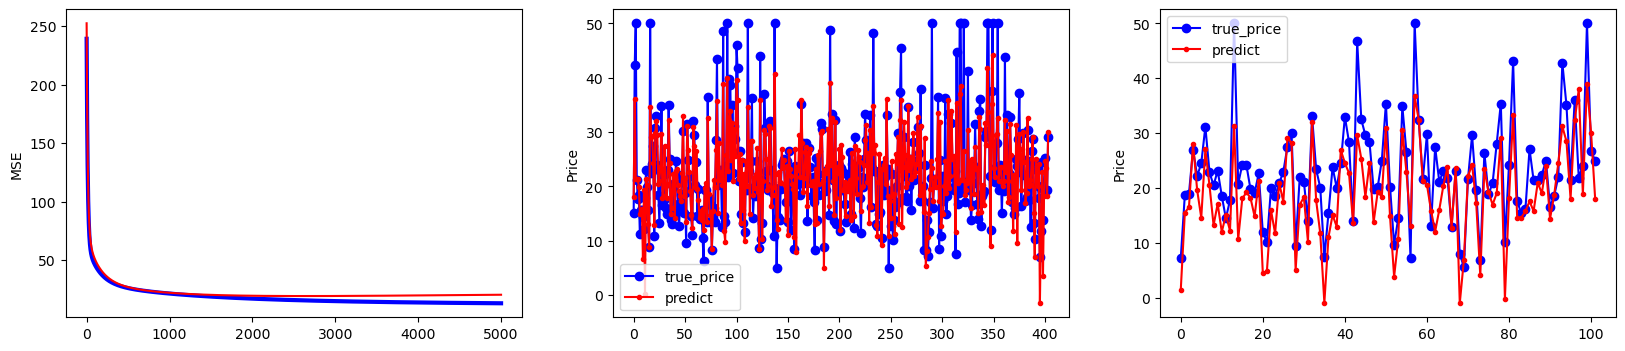

In [6]:
plt.figure(figsize=(20,4))

plt.subplot(1,3,1)
plt.ylabel("MSE")
plt.plot(mse_train,color="blue",linewidth=3)
plt.plot(mse_test,color="red",linewidth=1.5)

plt.subplot(1,3,2)
plt.plot(y_train,color="blue",marker="o",label="true_price")
plt.plot(PRED_train,color="red",marker=".",label="predict")
plt.legend()
plt.ylabel("Price")

plt.subplot(1,3,3)
plt.plot(y_test,color="blue",marker="o",label="true_price")
plt.plot(PRED_test,color="red",marker=".",label="predict")
plt.legend()
plt.ylabel("Price")

plt.show()